In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from collections import Counter
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Data Analysis

In [3]:
df.head(10)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
df.head(n=10).style.hide_index()

C:\Users\91639\AppData\Local\Temp\ipykernel_26236\4174695422.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df.head(n=10).style.hide_index()


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,nan,never smoked,1
31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
56669,Male,81.000000,0,0,Yes,Private,Urban,186.210000,29.000000,formerly smoked,1
53882,Male,74.000000,1,1,Yes,Private,Rural,70.090000,27.400000,never smoked,1
10434,Female,69.000000,0,0,No,Private,Urban,94.390000,22.800000,never smoked,1
27419,Female,59.000000,0,0,Yes,Private,Rural,76.150000,nan,Unknown,1
60491,Female,78.000000,0,0,Yes,Private,Urban,58.570000,24.200000,Unknown,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# df.hist(bins=50,figsize=(20,15))
# plt.show()

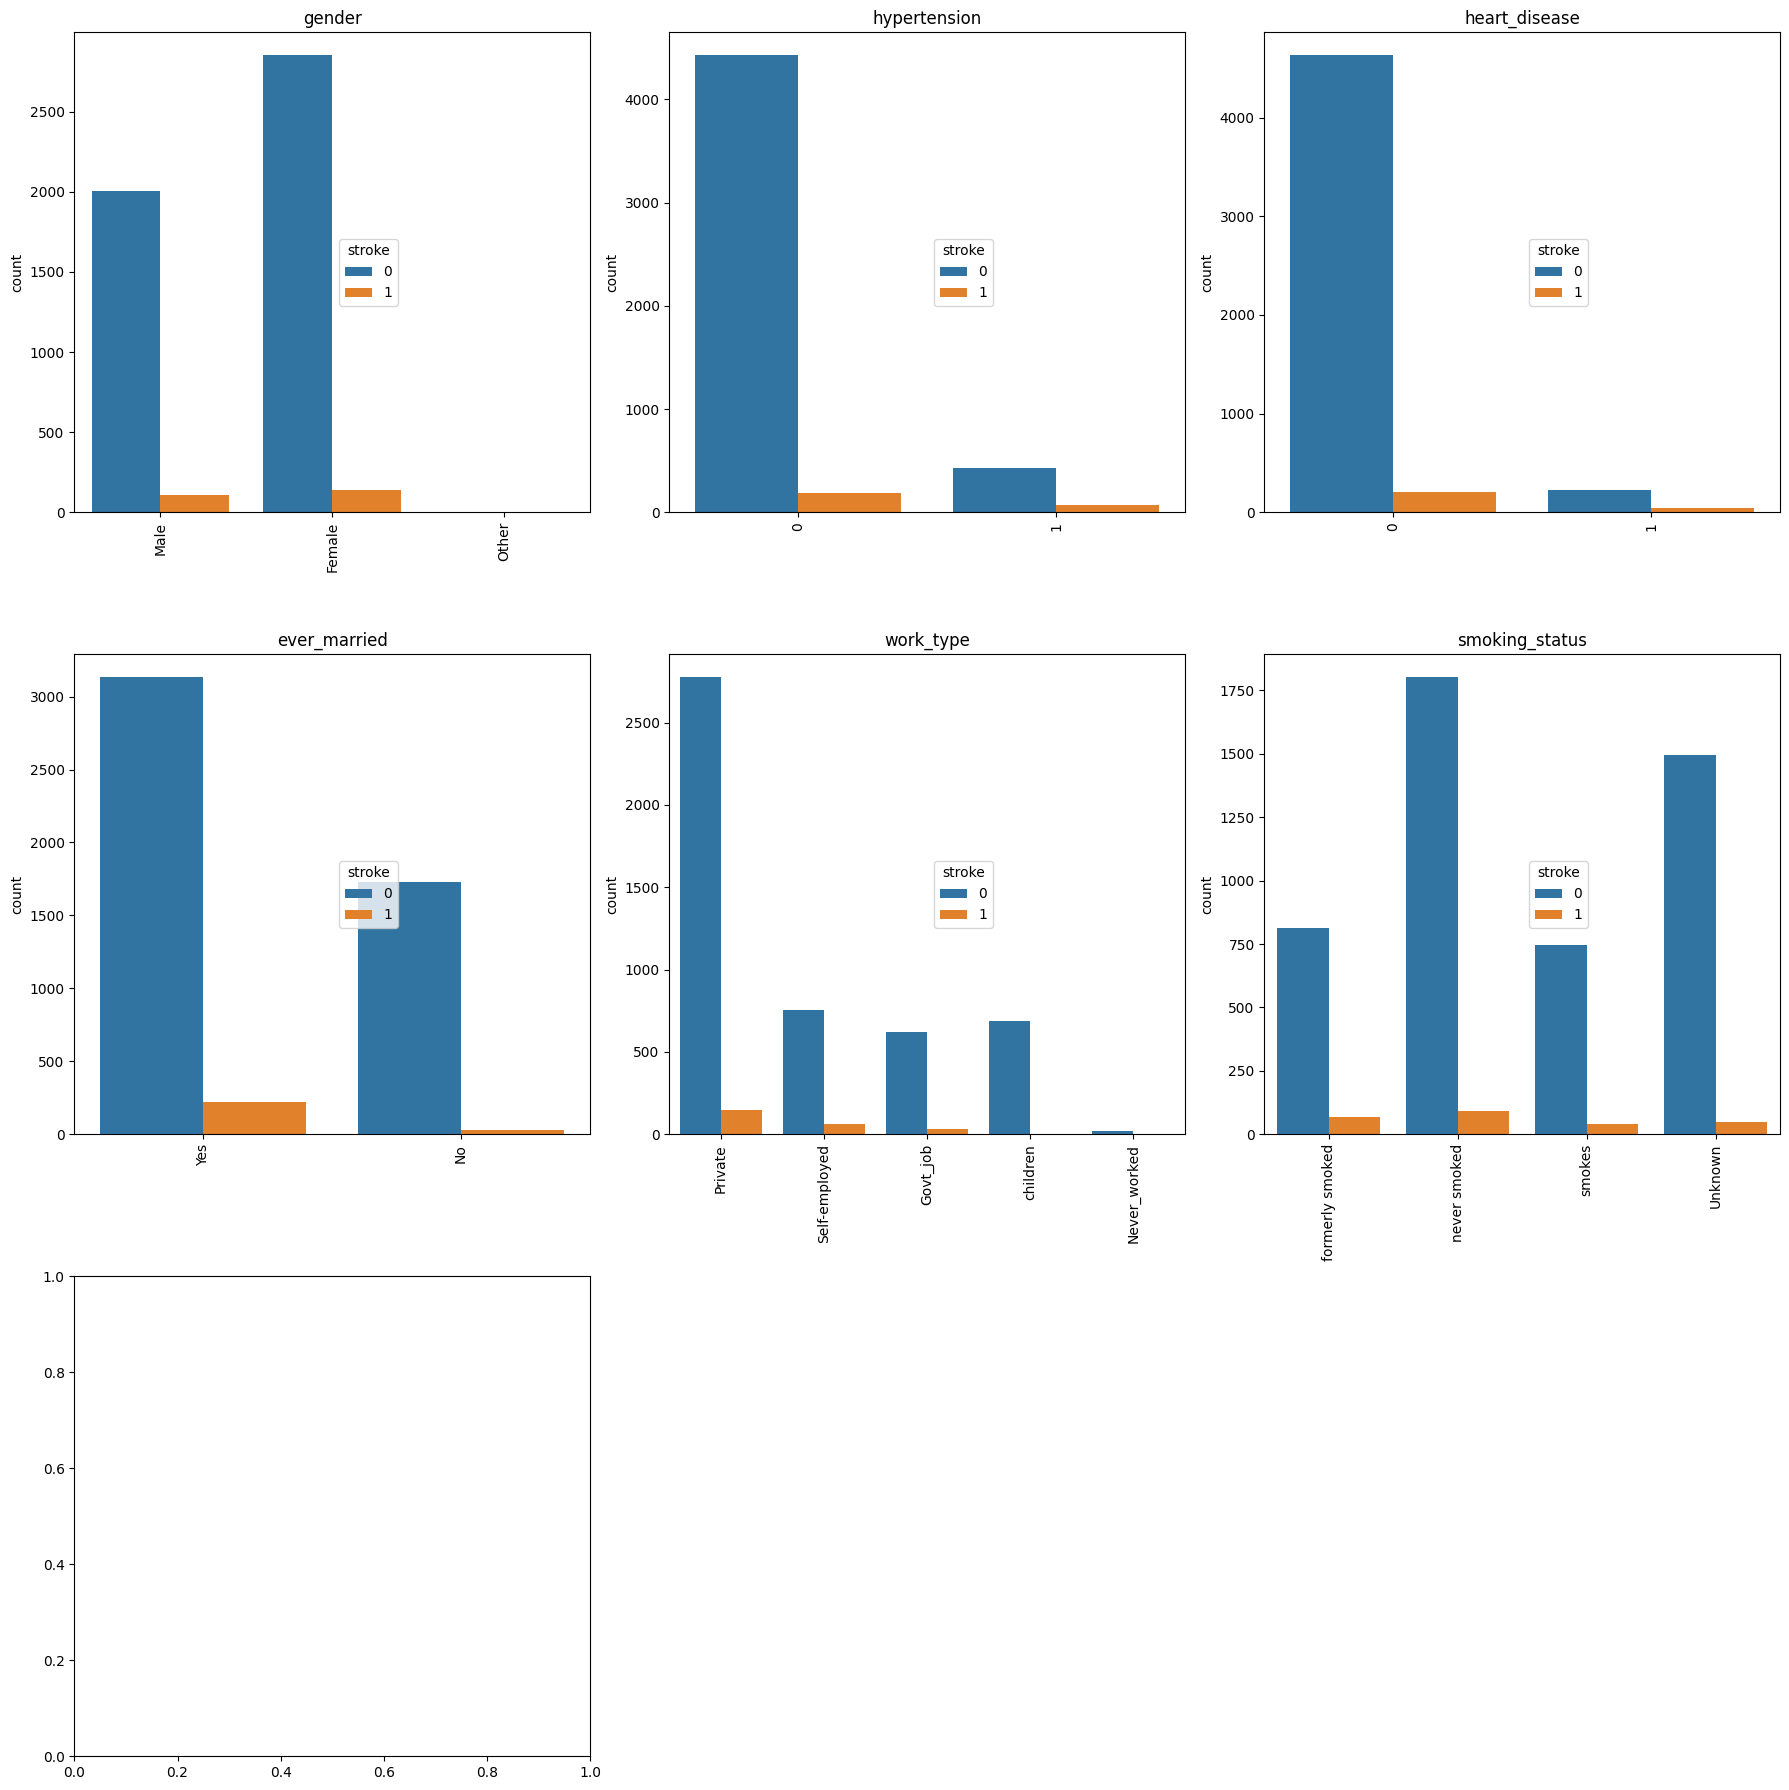

In [7]:
# # print(sorted(Counter(df['stroke']).items()))
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=df, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(0.5, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

Filling Missing Values in BMI

In [8]:
dfd=df.sort_values("age")
dfd

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4590,19271,Female,82.00,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
4094,25510,Male,82.00,0,0,Yes,Self-employed,Urban,111.81,19.8,formerly smoked,0
2341,10649,Female,82.00,0,0,Yes,Private,Urban,80.00,33.6,never smoked,0
4716,5387,Female,82.00,0,0,No,Private,Rural,96.98,21.5,never smoked,0


In [9]:
dfd.interpolate(inplace=True)


In [10]:
dfd.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
dfd


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4590,19271,Female,82.00,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
4094,25510,Male,82.00,0,0,Yes,Self-employed,Urban,111.81,19.8,formerly smoked,0
2341,10649,Female,82.00,0,0,Yes,Private,Urban,80.00,33.6,never smoked,0
4716,5387,Female,82.00,0,0,No,Private,Rural,96.98,21.5,never smoked,0


Data Cleaning:
Drop unrelevant columns,
Outliers

In [12]:
dfd.drop(['id'], inplace=True, axis=1)

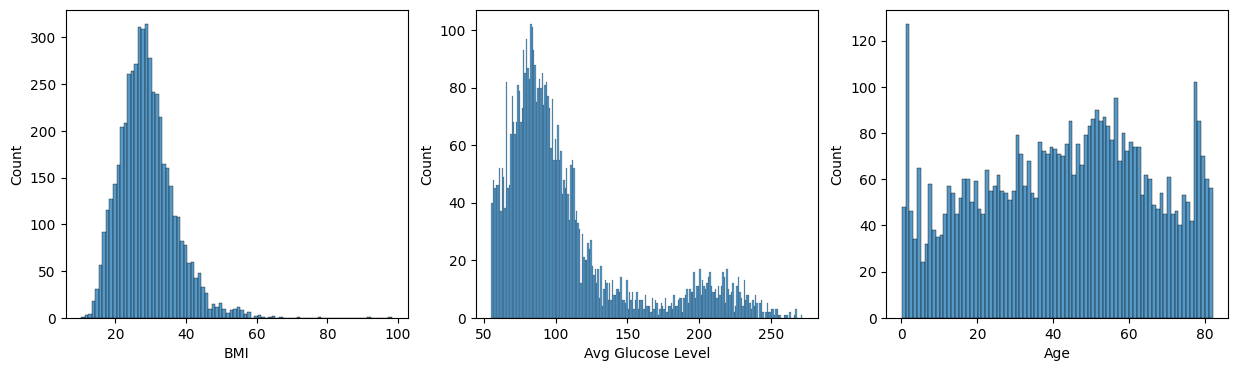

In [13]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(15,4))

sns.histplot(dfd['bmi'], bins=np.arange(dfd['bmi'].min(), dfd['bmi'].max()+1), ax = ax1)
ax1.set(xlabel='BMI')
sns.histplot( dfd['avg_glucose_level'], bins=np.arange(dfd['avg_glucose_level'].min(), dfd['avg_glucose_level'].max()+1), ax = ax2)
ax2.set(xlabel='Avg Glucose Level')
sns.histplot(dfd['age'], bins=np.arange(dfd['age'].min(), dfd['age'].max()+1), ax = ax3)
ax3.set(xlabel='Age')
plt.show()

In [14]:
# from sklearn.ensemble import IsolationForest
# model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
# model.fit(dfd[['bmi']])
# dfd['scores']=model.decision_function(dfd[['bmi']])
# dfd['anomaly']=model.predict(dfd[['bmi']])
# dfd.head(20)
# anomaly=dfd.loc[dfd['anomaly']==-1]
# anomaly_index=list(anomaly.index)
# print(anomaly)
# outliers_counter = len(dfd[dfd['bmi'] > 80])
# outliers_counter


In [15]:
# from sklearn.ensemble import IsolationForest
# model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
# model.fit(dfd[['avg_glucose_level']])
# dfd['scores']=model.decision_function(dfd[['avg_glucose_level']])
# dfd['anomaly']=model.predict(dfd[['avg_glucose_level']])
# dfd.head(20)
# anomaly=dfd.loc[dfd['anomaly']==-1]
# anomaly_index=list(anomaly.index)
# print(anomaly)
# outliers_counter = len(dfd[dfd['avg_glucose_level'] > 300])
# outliers_counter

In [16]:
dfd.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   521
smoking_status          4
stroke                  2
dtype: int64

Label Encoding for:-
1. gender
2. residence type
3. marital status

One-Hot Encoding for:-
1. work status
2. smokimg status

Label Encoding

In [17]:
dfd["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [18]:
#gender
dfd.replace(to_replace="Other",value="Female",inplace=True)

In [19]:
label_encoder = preprocessing.LabelEncoder()
dfd['gender']= label_encoder.fit_transform(dfd['gender'])
dfd['gender'].unique()

array([1, 0])

In [20]:
#ever_married
dfd['ever_married']= label_encoder.fit_transform(dfd['ever_married'])
dfd['ever_married'].unique()
#Residence_type
dfd['Residence_type']= label_encoder.fit_transform(dfd['Residence_type'])
dfd['Residence_type'].unique()

array([0, 1])

One Hot Encoding

In [21]:
dfd["work_type"].value_counts()
work_type_df=dfd[["work_type"]]
encoder1=OneHotEncoder()
work_type_1hot=encoder1.fit_transform(work_type_df)
work_type_1hot
encoder1.categories_
#output is sciPy sparse matrics instead of numpy array
work_type_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [22]:
dfd["smoking_status"].value_counts()
smoking_df=dfd[["smoking_status"]]
encoder2=OneHotEncoder()
smoking_1hot=encoder2.fit_transform(smoking_df)
smoking_1hot
encoder2.categories_
smoking_1hot.toarray()


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [23]:
newdf = pd.get_dummies(dfd, columns = ['work_type','smoking_status'])
newdf

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3295,1,0.08,0,0,0,0,70.33,16.9,0,0,0,0,0,1,1,0,0,0
1614,0,0.08,0,0,0,1,139.67,14.1,0,0,0,0,0,1,1,0,0,0
3618,1,0.16,0,0,0,1,114.71,17.4,0,0,0,0,0,1,1,0,0,0
4021,1,0.16,0,0,0,1,109.52,13.9,0,0,0,0,0,1,1,0,0,0
3968,1,0.16,0,0,0,0,69.79,13.0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0,82.00,1,1,1,1,101.56,31.5,0,0,0,0,1,0,0,0,1,0
4094,1,82.00,0,0,1,1,111.81,19.8,0,0,0,0,1,0,0,1,0,0
2341,0,82.00,0,0,1,1,80.00,33.6,0,0,0,1,0,0,0,0,1,0
4716,0,82.00,0,0,0,0,96.98,21.5,0,0,0,1,0,0,0,0,1,0


In [24]:
# NORMALIZTION FUNCTION
def normalize(data):
    min = np.min(data)
    max = np.max(data)
    old_range = max - min
    new_min = 0.0
    new_max = 1.0
    new_range = new_max - new_min
    scale = new_range / old_range
    norm_data=[(x - min)*scale + new_min for x in data]
    return(norm_data)
df_norm=newdf.copy()
for i in newdf:
    df_norm[i]=normalize(newdf[i])

<AxesSubplot:>

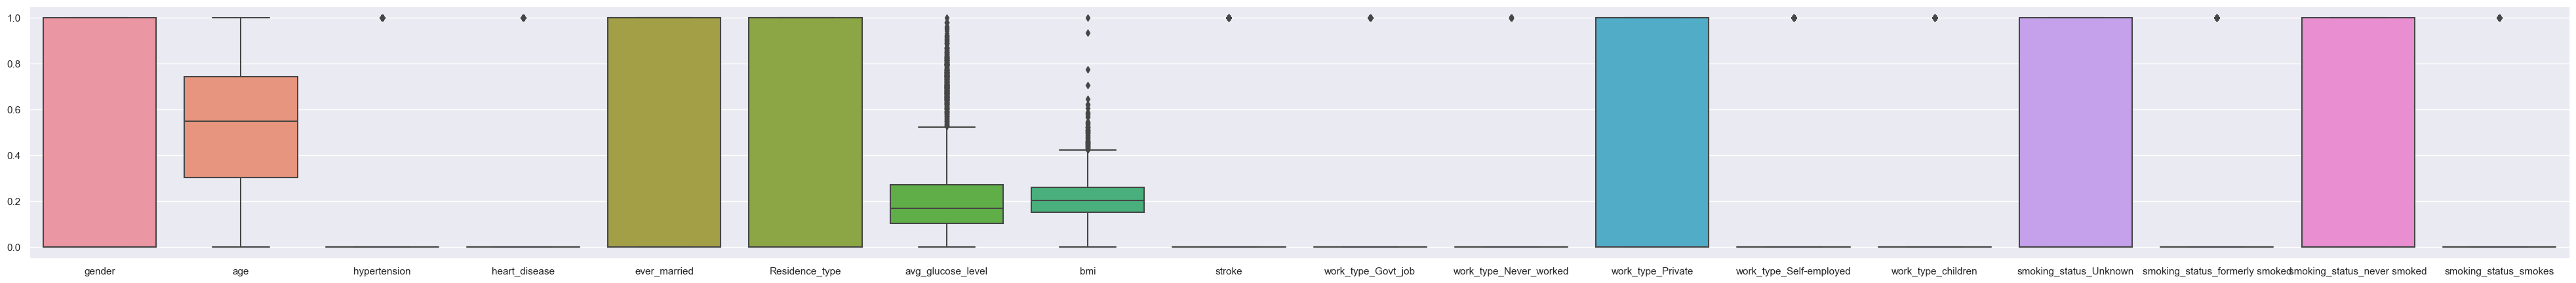

In [25]:
sns.set(font_scale = 1)
sns.set(rc={"figure.figsize":(50, 5)})
sns.boxplot(data=df_norm)

Data Visualization

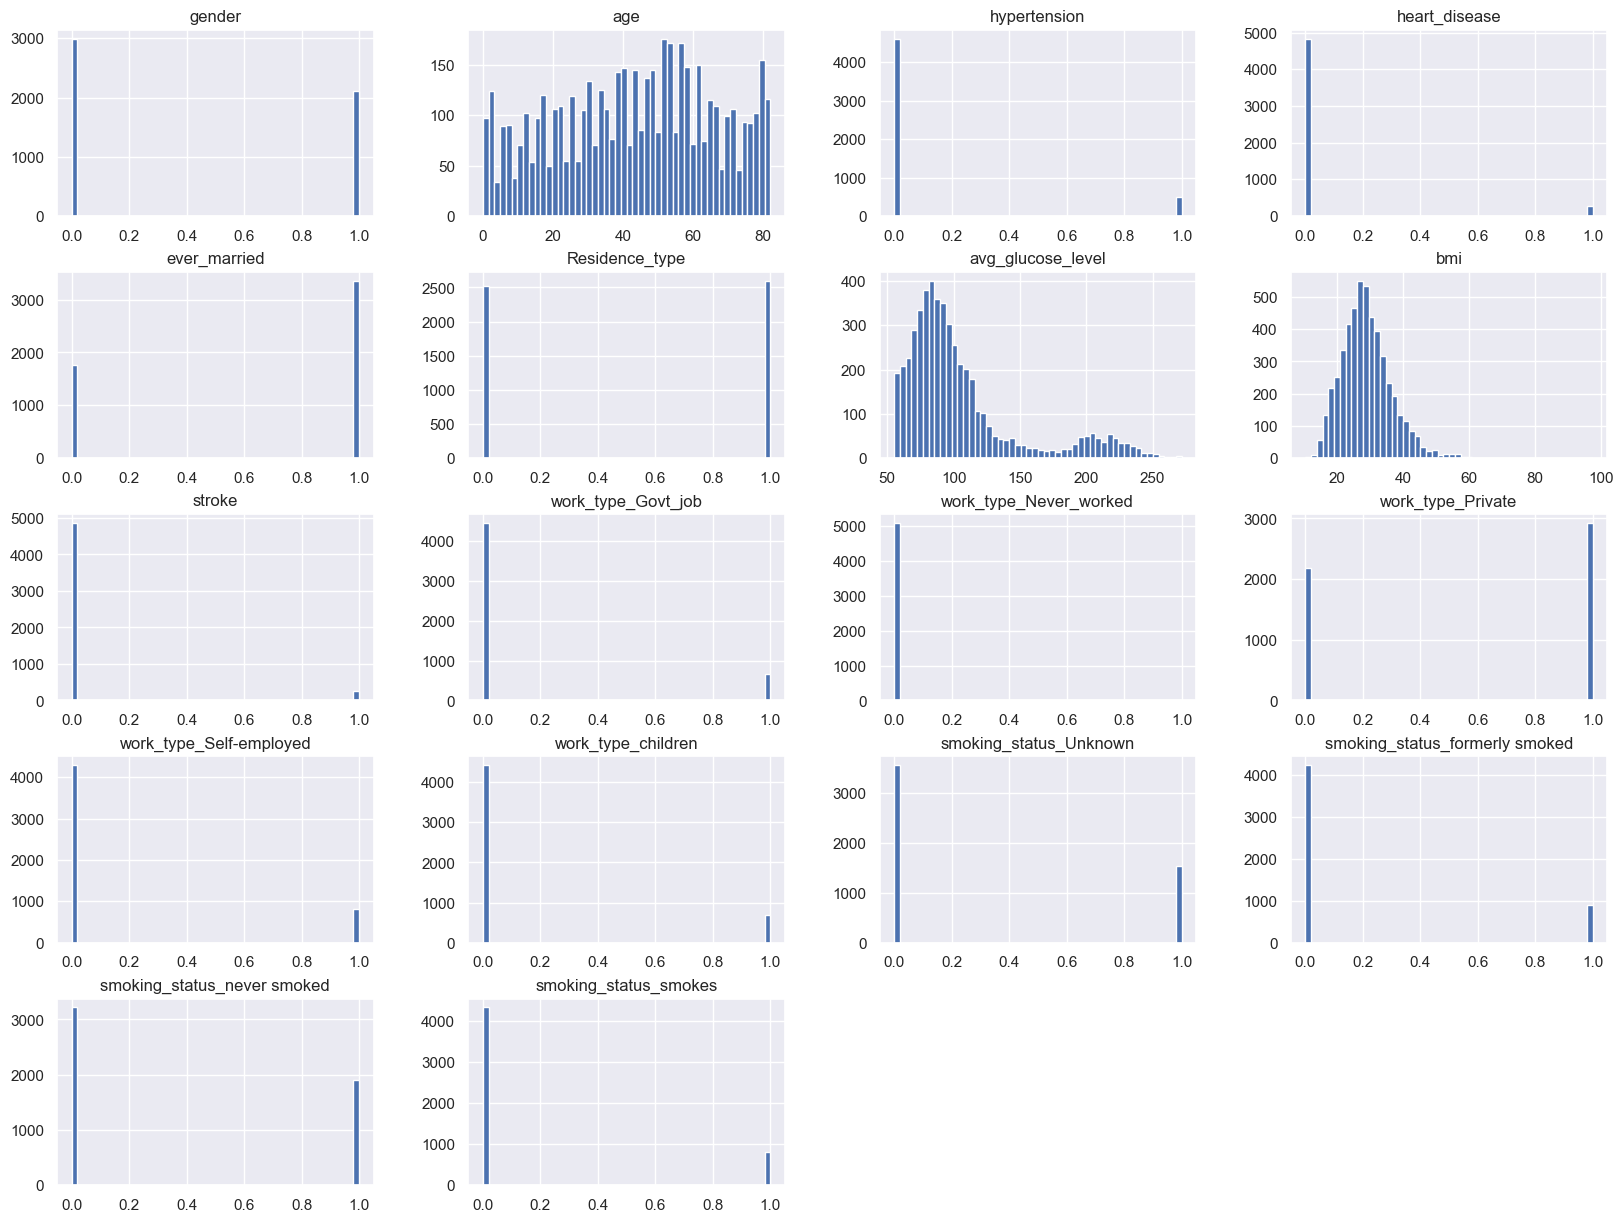

In [26]:
newdf.hist(bins=50,figsize=(20,15))
plt.show()

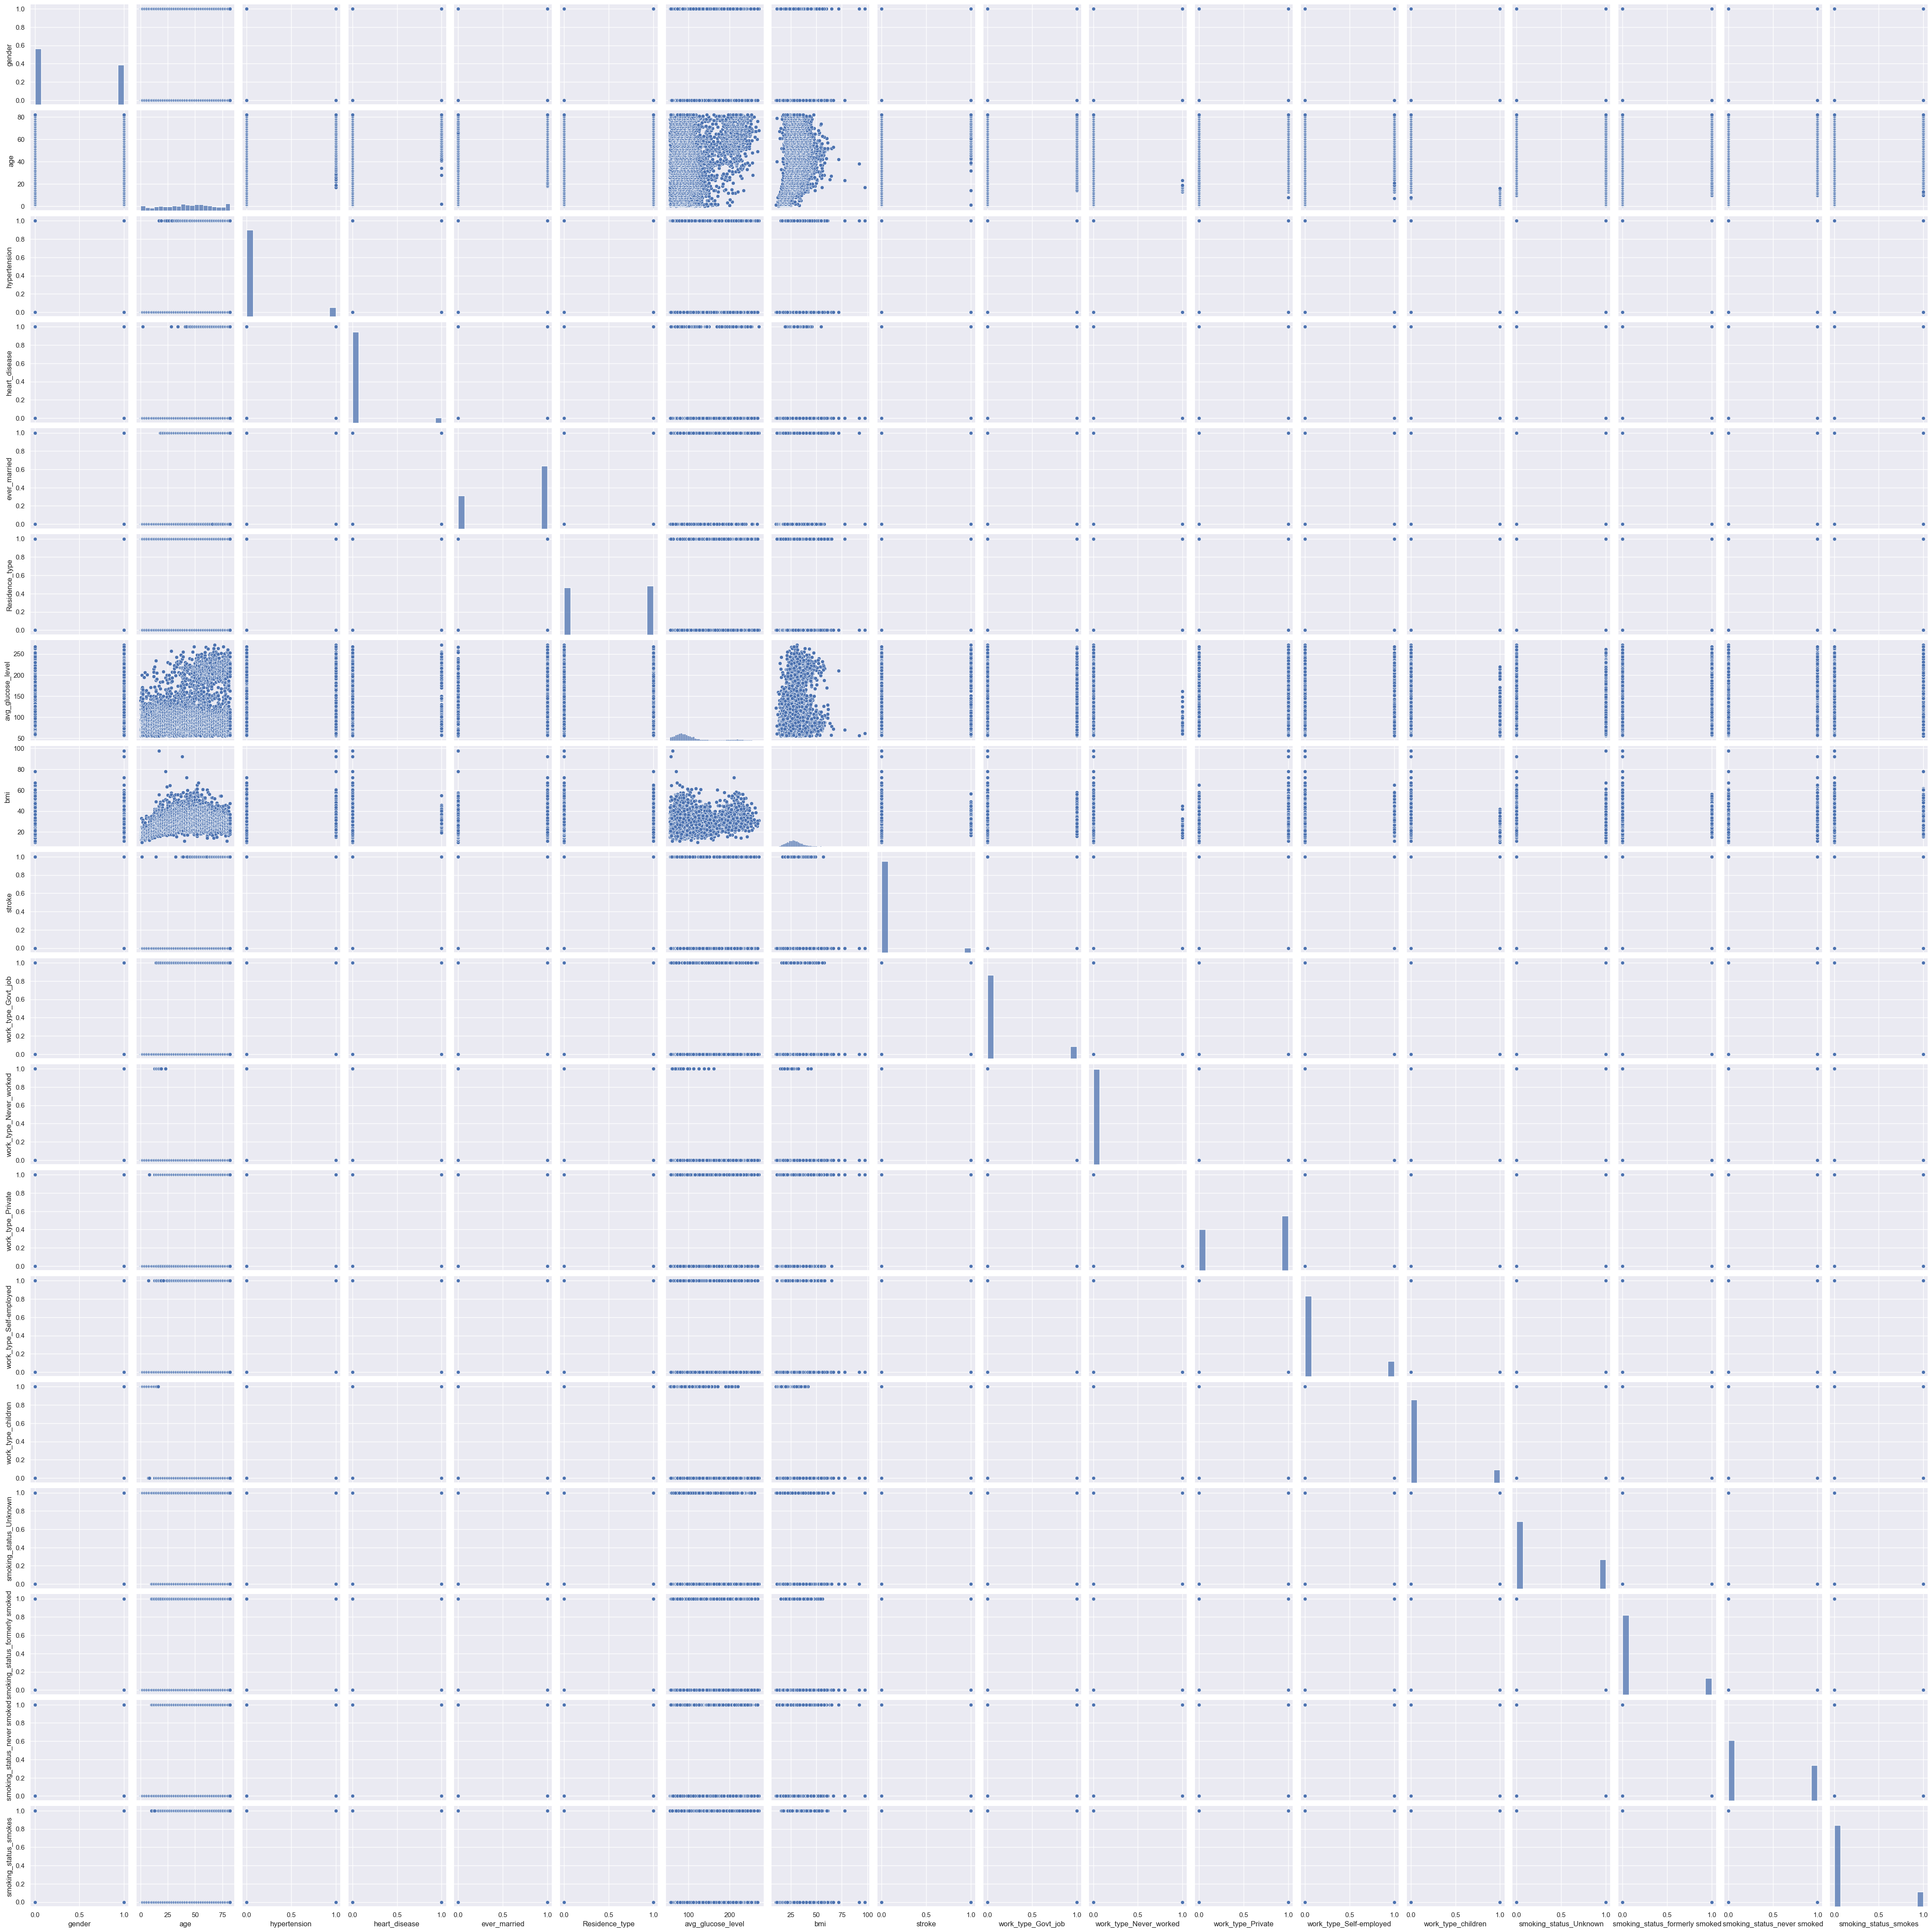

In [27]:
sns.pairplot(newdf)

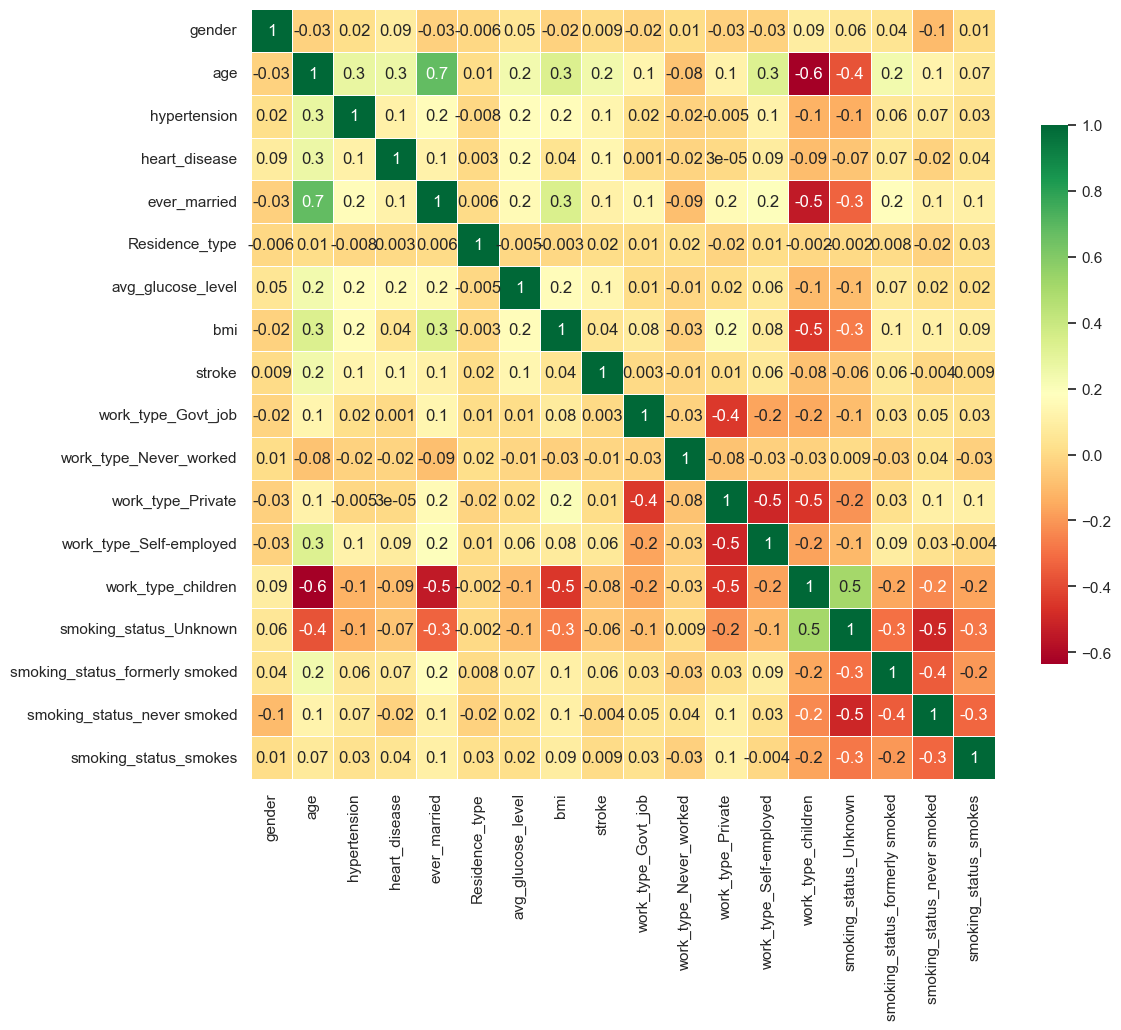

In [28]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(newdf.corr(),  annot=True, 
                        fmt='.1g', 
                        cbar=True, 
                        cbar_kws={'shrink' : 0.7}, 
                        linewidth=0.6,
                        cmap='RdYlGn',linewidths=0.30)
plt.show()

Sampling

In [29]:
last_column=newdf.pop('stroke')

In [30]:
newdf.insert(17,'stroke',last_column)

In [31]:
newdf

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
3295,1,0.08,0,0,0,0,70.33,16.9,0,0,0,0,1,1,0,0,0,0
1614,0,0.08,0,0,0,1,139.67,14.1,0,0,0,0,1,1,0,0,0,0
3618,1,0.16,0,0,0,1,114.71,17.4,0,0,0,0,1,1,0,0,0,0
4021,1,0.16,0,0,0,1,109.52,13.9,0,0,0,0,1,1,0,0,0,0
3968,1,0.16,0,0,0,0,69.79,13.0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0,82.00,1,1,1,1,101.56,31.5,0,0,0,1,0,0,0,1,0,0
4094,1,82.00,0,0,1,1,111.81,19.8,0,0,0,1,0,0,1,0,0,0
2341,0,82.00,0,0,1,1,80.00,33.6,0,0,1,0,0,0,0,1,0,0
4716,0,82.00,0,0,0,0,96.98,21.5,0,0,1,0,0,0,0,1,0,0


TRain and Test split

In [32]:
X=newdf
Y=newdf['stroke']
X.drop('stroke',axis=1,inplace=True)

UnderSampling using prototype generation

In [33]:
# from imblearn.under_sampling import ClusterCentroids
# cc=ClusterCentroids(random_state=42)
# print('Original dataset shape %s'%Counter(Y))
# X_train_resampled,y_train_resampled=cc.fit_resample(X,Y)
# print('After undersample dataset shape %s',Counter(y_train_resampled))
# #scatter plot by class label
# import matplotlib.pyplot as plt 
# plt.figure(figsize=(8,5))
# counter=Counter(y_train_resampled)
# for label, _ in counter.items():
#     row_ix=np.where(y_train_resampled==label)[0]
#     plt.scatter(X_train_resampled.loc[row_ix,"bmi"],X_train_resampled.loc[row_ix,"avg_glucose_level"])
# plt.legend()
# plt.show()

OverSampling with SMOTE

In [34]:
# from imblearn.over_sampling import SMOTE
# SMOTE=SMOTE()
# print('Original dataset shape %s'%Counter(Y))
# X_train_resampled,y_train_resampled=SMOTE.fit_resample(X,Y)
# print('After oversample dataset shape %s',Counter(y_train_resampled))
# #scatter plot by class label
# import matplotlib.pyplot as plt 
# plt.figure(figsize=(8,5))
# counter=Counter(y_train_resampled)
# for label, _ in counter.items():
#     row_ix=np.where(y_train_resampled==label)[0]
#     plt.scatter(X_train_resampled.loc[row_ix,"bmi"],X_train_resampled.loc[row_ix,"avg_glucose_level"])
# plt.legend()
# plt.show()

Mix OF UnderSampling and OverSampling

Original dataset shape Counter({0: 4861, 1: 249})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


After oversample dataset shape %s Counter({1: 4583, 0: 3664})


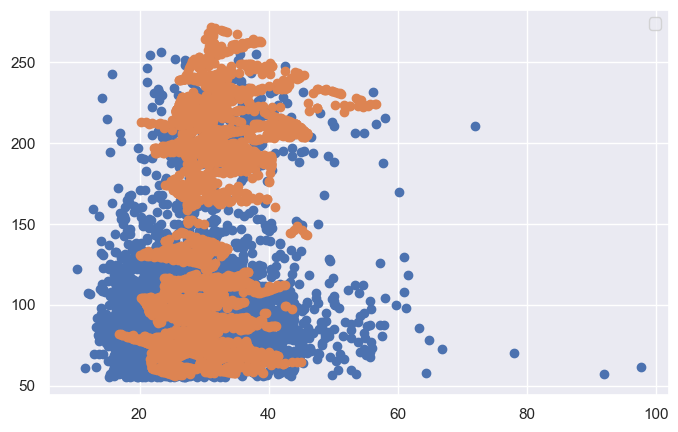

In [35]:
from imblearn.combine import SMOTEENN
SMOTEENN=SMOTEENN()
print('Original dataset shape %s'%Counter(Y))
X_train_resampled,y_train_resampled=SMOTEENN.fit_resample(X,Y)
print('After oversample dataset shape %s',Counter(y_train_resampled))
#scatter plot by class label
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,5))
counter=Counter(y_train_resampled)
for label, _ in counter.items():
    row_ix=np.where(y_train_resampled==label)[0]
    plt.scatter(X_train_resampled.loc[row_ix,"bmi"],X_train_resampled.loc[row_ix,"avg_glucose_level"])
plt.legend()
plt.show()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_train_resampled,y_train_resampled, test_size=0.20, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

 Selecting ML Model

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [39]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

lr.score(x_test,y_test) *100

72.68757809185635

In [40]:
import seaborn as sns

In [41]:
pd.DataFrame(y_pred)

,0
0,1.183200
1,1.227911
2,0.395715
3,0.239451
4,0.892804
...,...
1645,0.050385
1646,0.914308
1647,0.899492
1648,0.168630


Data Mining

In [42]:
import seaborn as sns

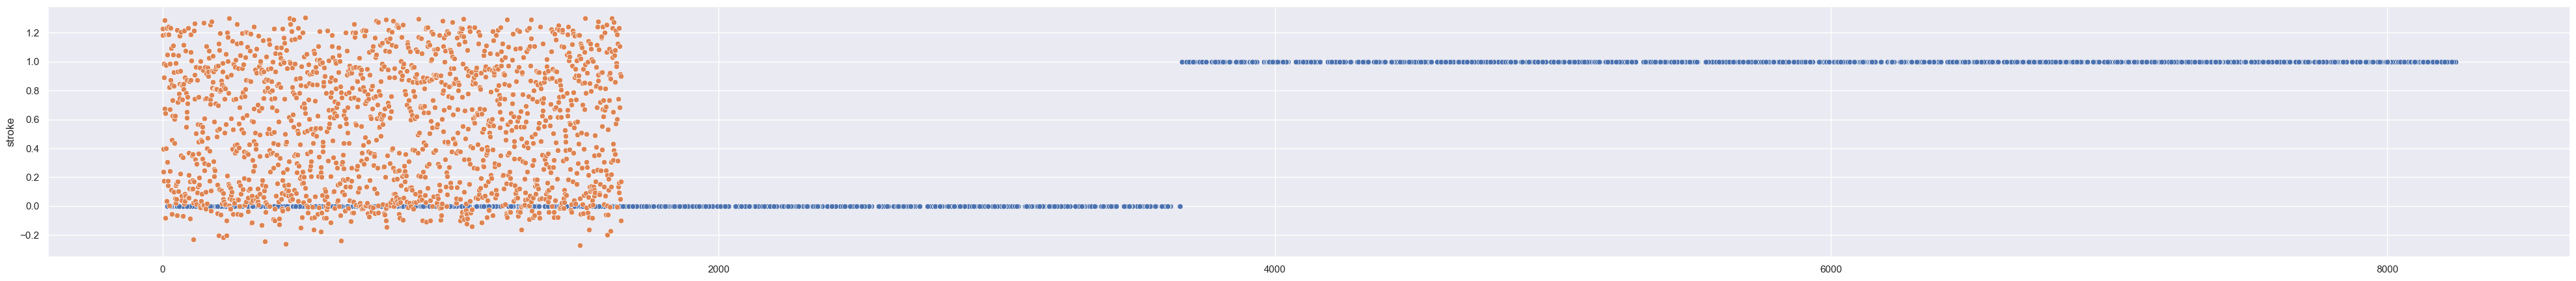

In [43]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
sns.scatterplot(data=y_test, palette='Reds')
sns.scatterplot(data=y_pred, palette='Blues')

plt.show()

In [44]:
newdf1=newdf.copy()

Extreme AGE

In [45]:
# Extreme Values
print("age min : ", newdf1['age'].min())
print("age max : ", newdf1['age'].max())
# Extreme Index
print("index age min : ", newdf1['age'].idxmin())
print("index age min : ", newdf1['age'].idxmax())

age min :  0.08
age max :  82.0
index age min :  3295
index age min :  2314


In [46]:
newdf1.loc[[1614,23]]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1614,0,0.08,0,0,0,1,139.67,14.1,0,0,0,0,1,1,0,0,0
23,1,82.00,0,1,1,0,208.30,32.5,0,0,1,0,0,1,0,0,0


Extreme BMI

In [47]:
# Extreme Values
print("bmi min : ", newdf1['bmi'].min())
print("bmi max : ", newdf1['bmi'].max())
# Extreme Index
print("index bmi min : ", newdf1['bmi'].idxmin())
print("index bmi min : ", newdf1['bmi'].idxmax())

bmi min :  10.3
bmi max :  97.6
index bmi min :  1609
index bmi min :  2128


In [48]:
newdf1.loc[[1609,2128]]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1609,0,1.24,0,0,0,0,122.04,10.3,0,0,0,0,1,1,0,0,0
2128,1,17.00,1,0,0,0,61.67,97.6,0,0,1,0,0,1,0,0,0


Glucose Extreme

In [49]:
# Extreme Values
print("avg_glucose_level min : ", newdf1['avg_glucose_level'].min())
print("avg_glucose_level max : ", newdf1['avg_glucose_level'].max())
# Extreme Index
print("index avg_glucose_level min : ", newdf1['avg_glucose_level'].idxmin())
print("index avg_glucose_level min : ", newdf1['avg_glucose_level'].idxmax())

avg_glucose_level min :  55.12
avg_glucose_level max :  271.74
index avg_glucose_level min :  4886
index avg_glucose_level min :  193


In [50]:
newdf1.loc[[4886,193]]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4886,0,21.0,0,0,0,0,55.12,21.8,0,0,1,0,0,0,0,1,0
193,1,68.0,1,1,1,0,271.74,31.1,0,0,1,0,0,0,0,0,1


<AxesSubplot:ylabel='Density'>

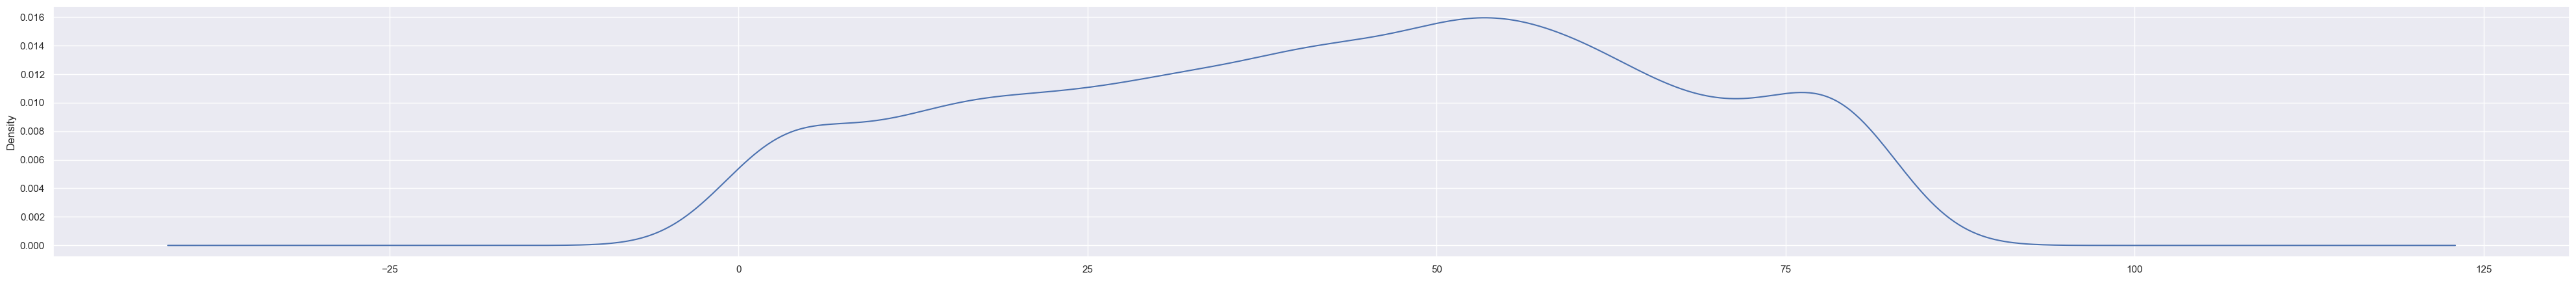

In [51]:
newdf1['age'].plot(kind='kde')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

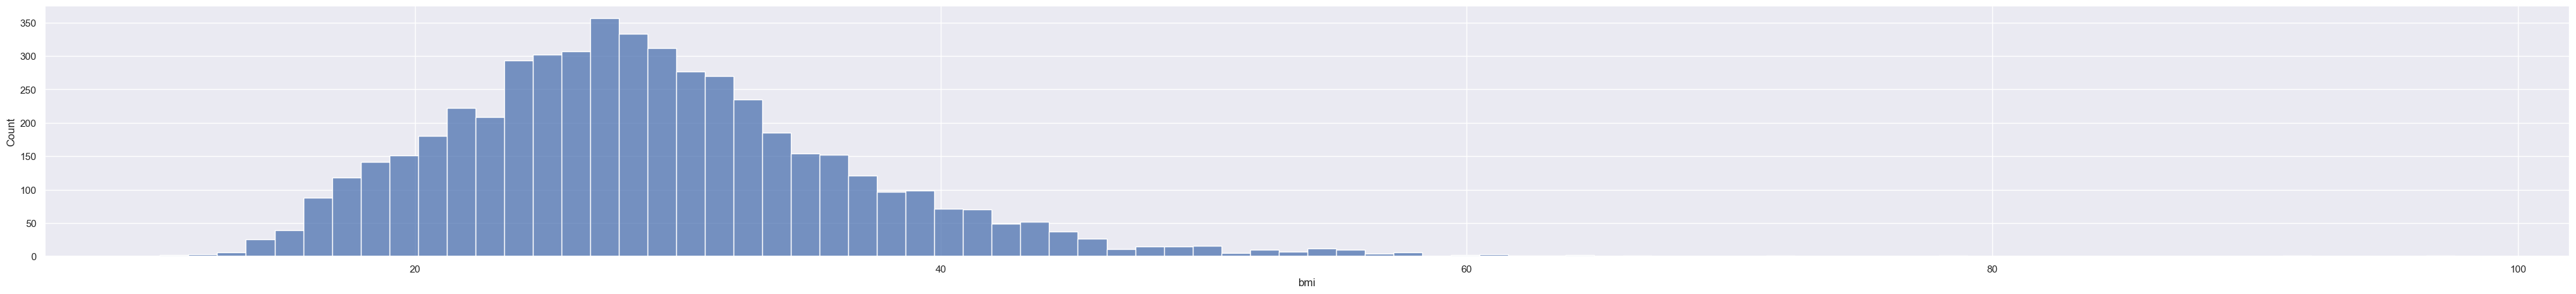

In [52]:
sns.histplot(newdf1['bmi'])

In [53]:
#dividing age into three categories: under 20, 20 to 40 , over 40
newdf1=newdf1.assign(age_category=pd.cut(newdf1['age'], 
                               bins=[0, 20, 40, 60, 100], 
                               labels=['Under 20', '20-40', '40-60', '60 Above']))
newdf1

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_category
3295,1,0.08,0,0,0,0,70.33,16.9,0,0,0,0,1,1,0,0,0,Under 20
1614,0,0.08,0,0,0,1,139.67,14.1,0,0,0,0,1,1,0,0,0,Under 20
3618,1,0.16,0,0,0,1,114.71,17.4,0,0,0,0,1,1,0,0,0,Under 20
4021,1,0.16,0,0,0,1,109.52,13.9,0,0,0,0,1,1,0,0,0,Under 20
3968,1,0.16,0,0,0,0,69.79,13.0,0,0,0,0,1,1,0,0,0,Under 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0,82.00,1,1,1,1,101.56,31.5,0,0,0,1,0,0,0,1,0,60 Above
4094,1,82.00,0,0,1,1,111.81,19.8,0,0,0,1,0,0,1,0,0,60 Above
2341,0,82.00,0,0,1,1,80.00,33.6,0,0,1,0,0,0,0,1,0,60 Above
4716,0,82.00,0,0,0,0,96.98,21.5,0,0,1,0,0,0,0,1,0,60 Above


In [54]:
newdf1.drop(['age'],axis=1, inplace=True)
newdf1

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_category
3295,1,0,0,0,0,70.33,16.9,0,0,0,0,1,1,0,0,0,Under 20
1614,0,0,0,0,1,139.67,14.1,0,0,0,0,1,1,0,0,0,Under 20
3618,1,0,0,0,1,114.71,17.4,0,0,0,0,1,1,0,0,0,Under 20
4021,1,0,0,0,1,109.52,13.9,0,0,0,0,1,1,0,0,0,Under 20
3968,1,0,0,0,0,69.79,13.0,0,0,0,0,1,1,0,0,0,Under 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0,1,1,1,1,101.56,31.5,0,0,0,1,0,0,0,1,0,60 Above
4094,1,0,0,1,1,111.81,19.8,0,0,0,1,0,0,1,0,0,60 Above
2341,0,0,0,1,1,80.00,33.6,0,0,1,0,0,0,0,1,0,60 Above
4716,0,0,0,0,0,96.98,21.5,0,0,1,0,0,0,0,1,0,60 Above


In [55]:
#making categories for high low and medium bmi
newdf1=newdf1.assign(bmi_category=pd.cut(newdf1['bmi'], 
                               bins=[0, 18.5, 24.9,29.9, 100], 
                               labels=['Underweight', 'Normal', 'Overweight','Obese']))
newdf1

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_category,bmi_category
3295,1,0,0,0,0,70.33,16.9,0,0,0,0,1,1,0,0,0,Under 20,Underweight
1614,0,0,0,0,1,139.67,14.1,0,0,0,0,1,1,0,0,0,Under 20,Underweight
3618,1,0,0,0,1,114.71,17.4,0,0,0,0,1,1,0,0,0,Under 20,Underweight
4021,1,0,0,0,1,109.52,13.9,0,0,0,0,1,1,0,0,0,Under 20,Underweight
3968,1,0,0,0,0,69.79,13.0,0,0,0,0,1,1,0,0,0,Under 20,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0,1,1,1,1,101.56,31.5,0,0,0,1,0,0,0,1,0,60 Above,Obese
4094,1,0,0,1,1,111.81,19.8,0,0,0,1,0,0,1,0,0,60 Above,Normal
2341,0,0,0,1,1,80.00,33.6,0,0,1,0,0,0,0,1,0,60 Above,Obese
4716,0,0,0,0,0,96.98,21.5,0,0,1,0,0,0,0,1,0,60 Above,Normal


In [56]:
newdf1.drop(['bmi'],axis=1, inplace=True)
newdf1

,gender,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_category,bmi_category
3295,1,0,0,0,0,70.33,0,0,0,0,1,1,0,0,0,Under 20,Underweight
1614,0,0,0,0,1,139.67,0,0,0,0,1,1,0,0,0,Under 20,Underweight
3618,1,0,0,0,1,114.71,0,0,0,0,1,1,0,0,0,Under 20,Underweight
4021,1,0,0,0,1,109.52,0,0,0,0,1,1,0,0,0,Under 20,Underweight
3968,1,0,0,0,0,69.79,0,0,0,0,1,1,0,0,0,Under 20,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0,1,1,1,1,101.56,0,0,0,1,0,0,0,1,0,60 Above,Obese
4094,1,0,0,1,1,111.81,0,0,0,1,0,0,1,0,0,60 Above,Normal
2341,0,0,0,1,1,80.00,0,0,1,0,0,0,0,1,0,60 Above,Obese
4716,0,0,0,0,0,96.98,0,0,1,0,0,0,0,1,0,60 Above,Normal


In [57]:
#making categories for high low avg glucose level
newdf1=newdf1.assign(glusose_cat=pd.cut(newdf1['avg_glucose_level'], 
                               bins=[0.0, 140.0, 200.0,300.0], 
                               labels=['Under 140', '140-200', 'Over200']))

In [58]:
newdf1.drop(['avg_glucose_level'],axis=1, inplace=True)
newdf1

,gender,hypertension,heart_disease,ever_married,Residence_type,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_category,bmi_category,glusose_cat
3295,1,0,0,0,0,0,0,0,0,1,1,0,0,0,Under 20,Underweight,Under 140
1614,0,0,0,0,1,0,0,0,0,1,1,0,0,0,Under 20,Underweight,Under 140
3618,1,0,0,0,1,0,0,0,0,1,1,0,0,0,Under 20,Underweight,Under 140
4021,1,0,0,0,1,0,0,0,0,1,1,0,0,0,Under 20,Underweight,Under 140
3968,1,0,0,0,0,0,0,0,0,1,1,0,0,0,Under 20,Underweight,Under 140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0,1,1,1,1,0,0,0,1,0,0,0,1,0,60 Above,Obese,Under 140
4094,1,0,0,1,1,0,0,0,1,0,0,1,0,0,60 Above,Normal,Under 140
2341,0,0,0,1,1,0,0,1,0,0,0,0,1,0,60 Above,Obese,Under 140
4716,0,0,0,0,0,0,0,1,0,0,0,0,1,0,60 Above,Normal,Under 140


In [59]:
newdf1 = pd.get_dummies(newdf1, columns = ['age_category','bmi_category','glusose_cat'])
newdf1

,gender,hypertension,heart_disease,ever_married,Residence_type,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,age_category_20-40,age_category_40-60,age_category_60 Above,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,glusose_cat_Under 140,glusose_cat_140-200,glusose_cat_Over200
3295,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1614,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3618,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4021,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3968,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0,1,1,1,1,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
4094,1,0,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2341,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4716,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [60]:
#applying apriori algorithm in order to do perform associative rule

In [61]:
from mlxtend.frequent_patterns import apriori, association_rules

In [62]:
#set a threshold value for the support value and calculate the support value.
newdf1 = apriori(newdf1, min_support = 0.2, use_colnames = True, verbose = 1)
newdf1

Processing 20 combinations | Sampling itemset size 43


c:\Users\91639\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.413894,(gender)
1,0.656164,(ever_married)
2,0.508023,(Residence_type)
3,0.572407,(work_type_Private)
4,0.302153,(smoking_status_Unknown)
5,0.370254,(smoking_status_never smoked)
6,0.200587,(age_category_Under 20)
7,0.238552,(age_category_20-40)
8,0.305675,(age_category_40-60)
9,0.255186,(age_category_60 Above)


In [63]:
#Let's view our interpretation values using the Associan rule function.
df_ar = association_rules(newdf1, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(gender),(ever_married),0.413894,0.656164,0.264579,0.639243,0.974212,-0.007003,0.953096
1,(gender),(glusose_cat_Under 140),0.413894,0.839335,0.337182,0.814657,0.970599,-0.010214,0.866855
2,(Residence_type),(ever_married),0.508023,0.656164,0.334834,0.659091,1.004460,0.001487,1.008584
3,(work_type_Private),(ever_married),0.572407,0.656164,0.411742,0.719316,1.096244,0.036149,1.224993
4,(ever_married),(work_type_Private),0.656164,0.572407,0.411742,0.627498,1.096244,0.036149,1.147894
5,(smoking_status_never smoked),(ever_married),0.370254,0.656164,0.266536,0.719873,1.097093,0.023588,1.227428
6,(age_category_40-60),(ever_married),0.305675,0.656164,0.277886,0.909091,1.385462,0.077313,3.782192
7,(age_category_60 Above),(ever_married),0.255186,0.656164,0.235616,0.923313,1.407137,0.068173,4.483616
8,(bmi_category_Overweight),(ever_married),0.289628,0.656164,0.218787,0.755405,1.151244,0.028743,1.405737
9,(bmi_category_Obese),(ever_married),0.395695,0.656164,0.317221,0.801682,1.221769,0.057580,1.733755


Preparing Train and Test Dataset for all further Model Implementations

Analysis Technique:KNeighborsClassifier,LogisticRegression,GaussianNB,LinearSVC,RandomForestClassifier,GridSearchCV

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,precision_score,classification_report
from mlxtend.plotting import plot_confusion_matrix

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import StackingClassifier,RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [65]:
train_acc_list=[]
test_acc_list=[]
cm=[]
recall=[]
precision=[]
f1=[]
crp=[]
l=[train_acc_list,test_acc_list,cm,recall,precision,f1]

lr = LogisticRegression()
gnb=GaussianNB()
rf=random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5)
svc=LinearSVC(dual=False)
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10)
models=[lr,gnb,rf,svc,knn]
for model in models:
    model.fit(x_train,y_train)
    train_acc_list.append(round(model.score(x_train,y_train)*100,2))
    y_pred= model.predict(x_test)
    test_ac = accuracy_score(y_test, y_pred)
    cm.append(confusion_matrix(y_test, y_pred))
    test_acc_list.append(round(test_ac*100,2))
    precision.append(precision_score(y_test, y_pred))
    recall.append((y_test, y_pred))
    f1.append((y_test, y_pred))
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       730
           1       0.96      0.94      0.95       920

    accuracy                           0.95      1650
   macro avg       0.94      0.95      0.95      1650
weighted avg       0.95      0.95      0.95      1650

              precision    recall  f1-score   support

           0       0.44      1.00      0.61       730
           1       0.00      0.00      0.00       920

    accuracy                           0.44      1650
   macro avg       0.22      0.50      0.31      1650
weighted avg       0.20      0.44      0.27      1650



c:\Users\91639\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91639\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91639\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       730
           1       0.98      0.97      0.97       920

    accuracy                           0.97      1650
   macro avg       0.97      0.97      0.97      1650
weighted avg       0.97      0.97      0.97      1650

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       730
           1       0.96      0.94      0.95       920

    accuracy                           0.95      1650
   macro avg       0.94      0.95      0.95      1650
weighted avg       0.95      0.95      0.95      1650

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       730
           1       0.99      0.94      0.96       920

    accuracy                           0.96      1650
   macro avg       0.96      0.96      0.96      1650
weighted avg       0.96      0.96      0.96      1650



In [66]:
for i in cm:
    print(i)
    print('\n')

[[695  35]
 [ 54 866]]


[[730   0]
 [920   0]]


[[710  20]
 [ 30 890]]


[[696  34]
 [ 55 865]]


[[717  13]
 [ 56 864]]




In [67]:
for i,j in zip(models,test_acc_list) :
    print(i,"   ",j,'\n')

LogisticRegression()     94.61 

GaussianNB()     44.24 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 300]})     96.97 

LinearSVC(dual=False)     94.61 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3]})     95.82 



Analysis Technique: Decision Tree Classifier

Decision Tree:

Test Accuracy: 0.8515151515151516 

Confusion Matrix: 
 [[517 213]
 [ 32 888]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.71      0.81       730
           1       0.81      0.97      0.88       920

    accuracy                           0.85      1650
   macro avg       0.87      0.84      0.84      1650
weighted avg       0.87      0.85      0.85      1650



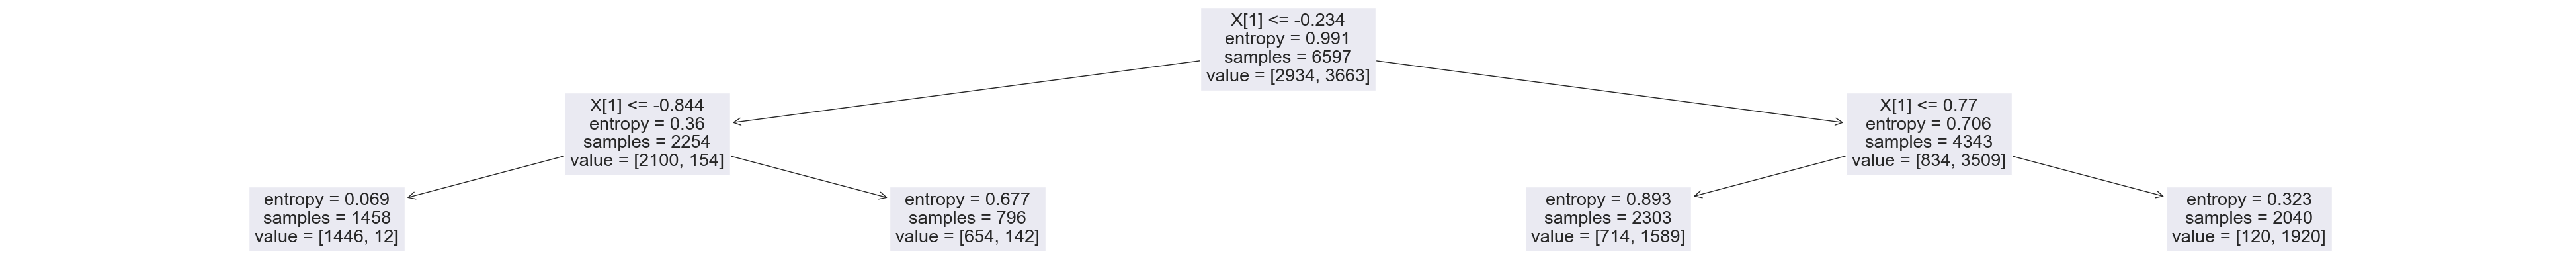

In [68]:
#Decision Tree Classifier
dct_clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
dct_clf.fit(x_train,y_train)
print("Decision Tree:\n")
plot_tree(dct_clf)

y_pred = dct_clf.predict(x_test)
print("Test Accuracy: {} \n".format(accuracy_score(y_test, y_pred)))

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print("Classification Report: \n", classification_report(y_test, y_pred))

Analysis Technique : K-Means Clustering

In [69]:
#K-means clustering
km_clf = KMeans(n_clusters=2, n_init=10, random_state=42)
km_clf.fit(x_train,y_train)

y_pred = km_clf.predict(x_test)
print("Test Accuracy: {} \n".format(accuracy_score(y_test, y_pred)))

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print("Classification Report: \n", classification_report(y_test, y_pred))

Test Accuracy: 0.6557575757575758 

Confusion Matrix: 
 [[163 567]
 [  1 919]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.22      0.36       730
           1       0.62      1.00      0.76       920

    accuracy                           0.66      1650
   macro avg       0.81      0.61      0.56      1650
weighted avg       0.78      0.66      0.59      1650

